Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


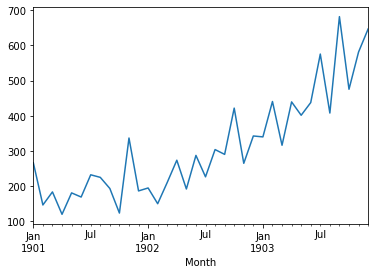

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo.txt', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

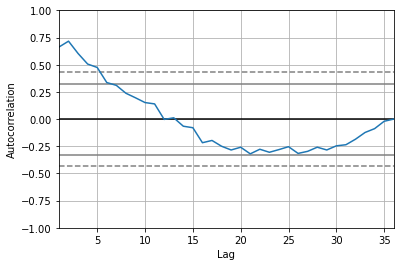

In [2]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(series)
pyplot.show()

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 14 Sep 2020   AIC                            406.340
Time:                        22:12:17   BIC                            417.227
Sample:                    02-01-1901   HQIC            

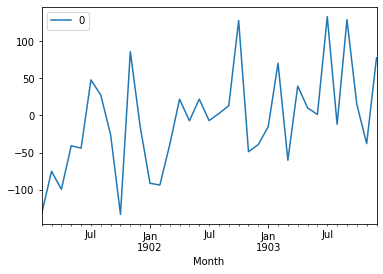

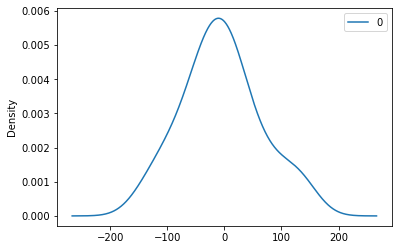

0
count   35.000000
mean    -5.495226
std     68.132882
min   -133.296614
25%    -42.477942
50%     -7.186613
75%     24.748329
max    133.237961


In [4]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=349.117703, expected=342.300000
predicted=306.513013, expected=339.700000
predicted=387.376470, expected=440.400000
predicted=348.154215, expected=315.900000
predicted=386.308852, expected=439.300000
predicted=356.082094, expected=401.300000
predicted=446.379448, expected=437.400000
predicted=394.737254, expected=575.500000
predicted=434.915429, expected=407.600000
predicted=507.923446, expected=682.000000
predicted=435.482928, expected=475.300000
predicted=652.743783, expected=581.300000
predicted=546.343427, expected=646.900000
Test MSE: 6958.325


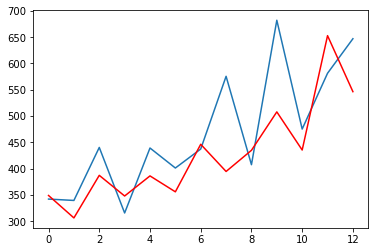

In [5]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()